In [2]:
import numpy as np, pandas as pd, scipy.stats as st
from scipy.stats import t, norm
from joblib import Parallel, delayed

In [3]:
data = pd.read_csv('data.csv')
num_obvs = 100000
# risks per sector
r = np.array([.295, .49, .41, .415, .338, .64, .403, .476])
#sec_loading maps sector to its risk, t is the threshold for defaults
data['sec_loading'], data['t'] = r[data['sector'].values], st.norm.ppf(data.p)
# 100k monte carlo simulations and len(r)+len(data) risk factors per one sample
factors, sample, vars = np.random.normal(0,1, (num_obvs, len(r)+len(data))), [], []

In [4]:
for obs in factors:
    m_factor, sec_factor, res_factor = obs[0], obs[:len(r)][data.sector.values], obs[len(r):]
    ind = r[0]**.5 * m_factor + (data.sec_loading-r[0])**.5 * sec_factor + (1-
                                                                            data.sec_loading)**.5 * res_factor < data.t
    loss = np.zeros((len(data),))
    loss[ind] = data[ind].m + data[ind].d * np.random.standard_t(3, size=sum(ind))
    sample.append(sum(loss))
    vars.append(np.var(loss))

In [5]:
# extracts the 1% quantile from the sorted list of 100k obsercations
VaR = np.percentile(-np.array(sample), 99.9)
variance = np.mean(vars)

In [5]:
print("Średnia wariancji strat:", variance)
print("VaR antetyczny (100-ty wynik):", VaR)

Średnia wariancji strat: 1351.0431603089255
VaR antetyczny (100-ty wynik): 23086.016916501278


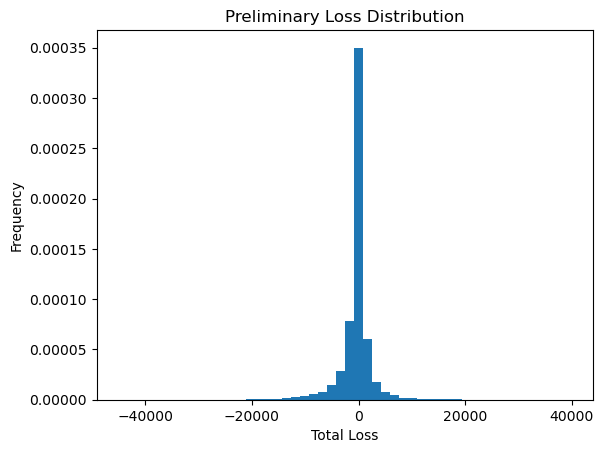

In [7]:
import matplotlib.pyplot as plt

plt.hist(sample, bins=50, density=True)
plt.title("Preliminary Loss Distribution")
plt.xlabel("Total Loss")
plt.ylabel("Frequency")

plt.show()

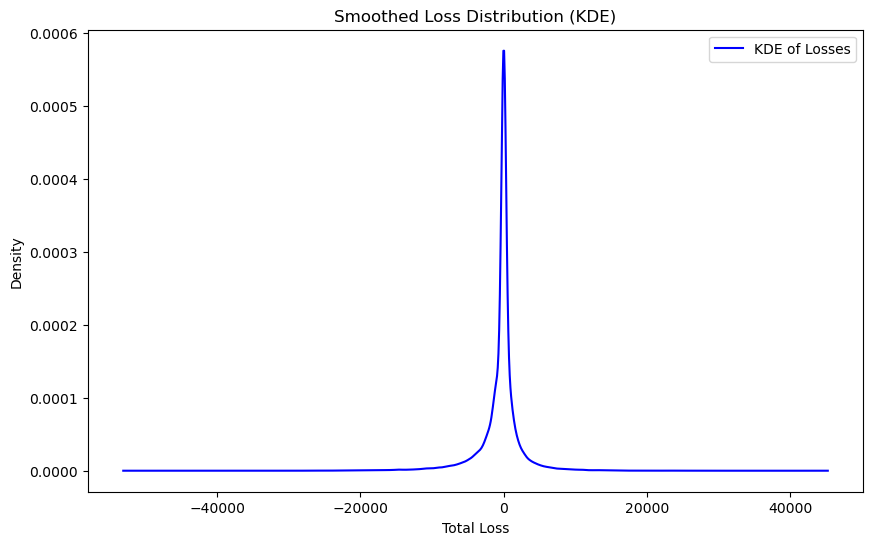

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

losses = np.array(sample)  

kde = gaussian_kde(losses)

x_values = np.linspace(min(losses), max(losses), 1000) 
kde_values = kde(x_values) 

plt.figure(figsize=(10, 6))
plt.plot(x_values, kde_values, color='blue', label='KDE of Losses')
plt.title("Smoothed Loss Distribution (KDE)")
plt.xlabel("Total Loss")
plt.ylabel("Density")
plt.legend()
plt.show()